
# *E. coli* Simulation Analysis

## Set up for analysis
### Load libraries

In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

# Load the libraries we need
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
import warnings

# Add wcEcoli root to the path, so we can load sim libraries
WC_ECOLI_DIRECTORY = os.path.expanduser("~/wcEcoli")
sys.path.append(WC_ECOLI_DIRECTORY)

# Load the sim libraries we need
from models.ecoli.analysis.readers.reader import Reader

# Initialise stuff
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 6.0

# IPython graphing produces a bunch of warnings we don't care about
warnings.filterwarnings('ignore') 

# mpld3.enable_notebook()

### Set paths to simulation data

In [2]:
# Fitted simulation data for the sim we're analysing
simData = "/home/acjs/wcEcoli/out/20160301.152504.128116/kb/simData_Fit_1.cPickle"

# Simulation output directory
simOut = "/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/"

+ Could autogenerate a notebook per simulation run

### Load reader so we can access the data

In [3]:
r = Reader(simData, simOut)

# Analysis

## Metabolism

A basic plot

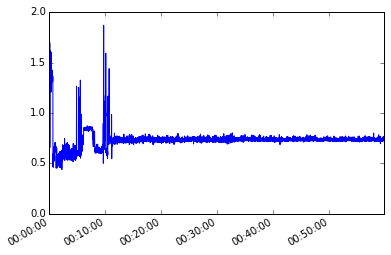

In [16]:
%matplotlib inline
r.fbaResults.externalExchangeFluxes['PROTON[p]'].plot()

External fluxes

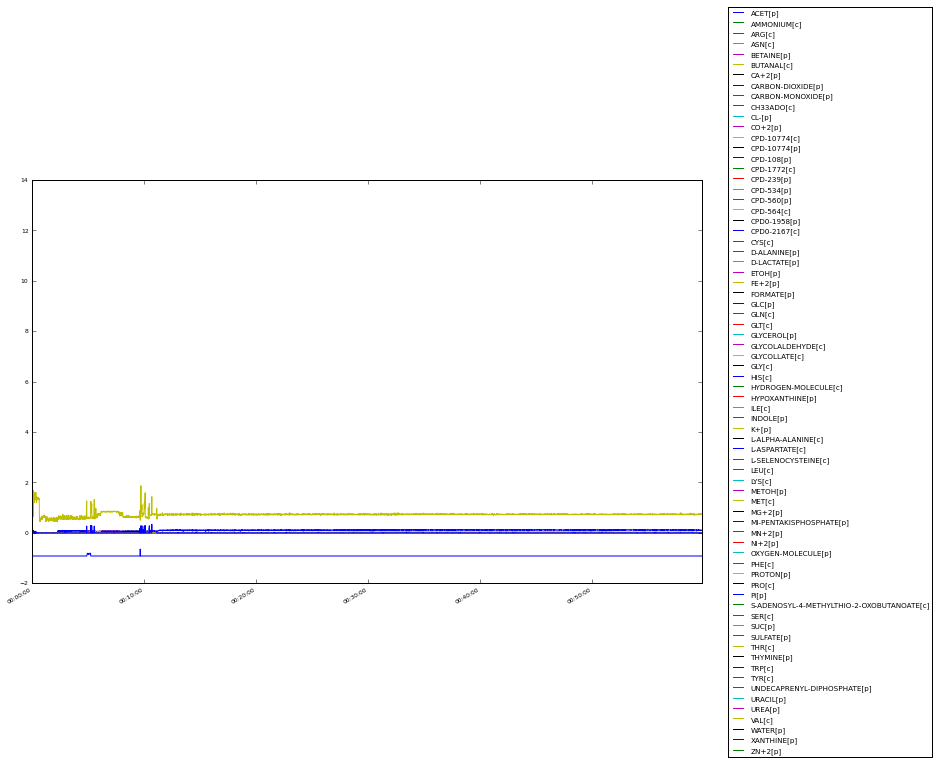

In [6]:
ax = r.fbaResults.externalExchangeFluxes.plot().legend(loc='center right', bbox_to_anchor=(1.35, 0.5))

Interactivity

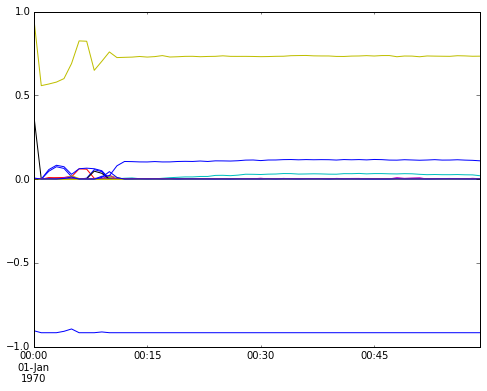

In [59]:
%matplotlib inline
mpld3.enable_notebook()

fig, ax = plt.subplots(1,1, figsize=(8,6))
r.fbaResults.externalExchangeFluxes.resample('1Min').plot(ax=ax, legend=False)

for i, line in enumerate(ax.lines):
    mpld3.plugins.connect(fig, mpld3.plugins.LineLabelTooltip(line, r.fbaResults.externalExchangeFluxes.columns[i]))

In [7]:
mpld3.disable_notebook()

In [73]:
%matplotlib notebook

def showfba(start_time=0, run_for=20):
    mpld3.disable_notebook()

    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 6

    fig, ax = plt.subplots(1,1)

    start = pd.to_datetime(start_time, unit="s")
    end = pd.to_datetime(start_time + run_for, unit="s")
    
    data = r.fbaResults.externalExchangeFluxes.iloc[100,:].reshape(8,9)
    im = ax.imshow(data, interpolation='nearest', aspect='auto', cmap='RdBu')

    t = ax.annotate("00:00:00", xy=(-30,2), xycoords='axes points')

    x, y = np.meshgrid(range(9), range(8))
    for i, coord in enumerate(zip(x.flatten(), y.flatten())):
        label = r.fbaResults.externalExchangeFluxes.columns[i]
        if len(label) > 10:
            label = label[:10]
        ax.annotate(label, xy=coord, ha="center")
    fig.canvas.draw()

    fig.colorbar(im)
    plt.show()
    for i, row in r.fbaResults.externalExchangeFluxes[start:end].iterrows():
        im.set_data(row.reshape(8,9))
        t.set_text(i.strftime('%H:%M:%S'))
        fig.canvas.draw()

<IPython.core.display.Javascript object>


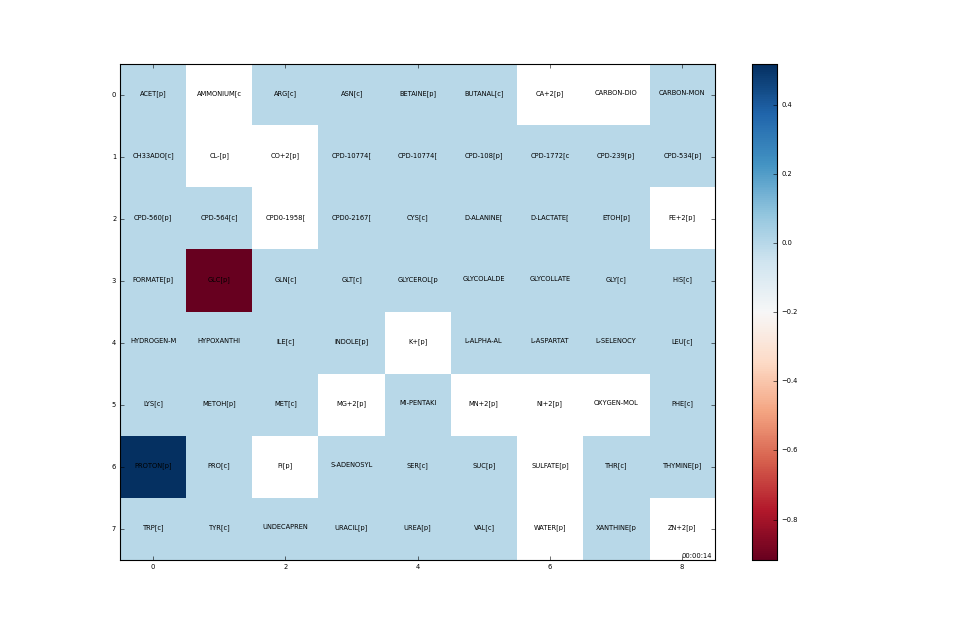

In [78]:
showfba(0, 15)

<IPython.core.display.Javascript object>


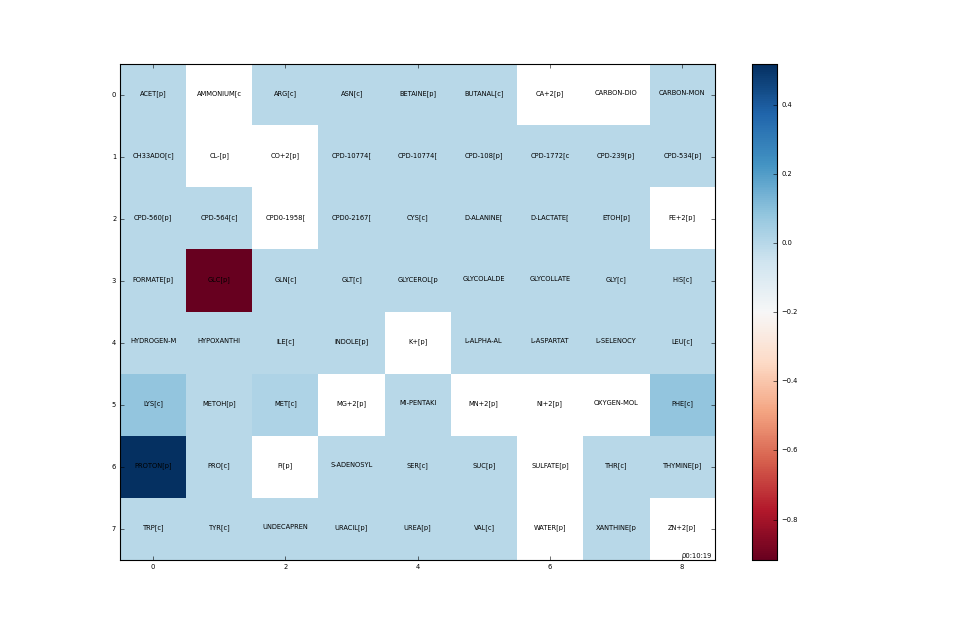

In [77]:
showfba(580, 40)

In [11]:
r.fbaResults.reactionFluxes.max()

1.1.1.83-RXN                                                                                                                                 0.000000e+00
DALADEHYDROG-RXN-D-ALANINE/CPD-9728/WATER//AMMONIUM/PYRUVATE/REDUCED-MENAQUINONE.64.                                                         0.000000e+00
RXN-14483-CPD-16502/WATER//CPD-16501/Pi.30.                                                                                                  0.000000e+00
TRANS-RXN0-567 (reverse)                                                                                                                     0.000000e+00
3.2.1.17-RXN-C6/WATER//C5/N-ACETYL-D-GLUCOSAMINE.36.                                                                                         0.000000e+00
TAGAALDOL-RXN (reverse)                                                                                                                      0.000000e+00
RXN0-7074                                                                   

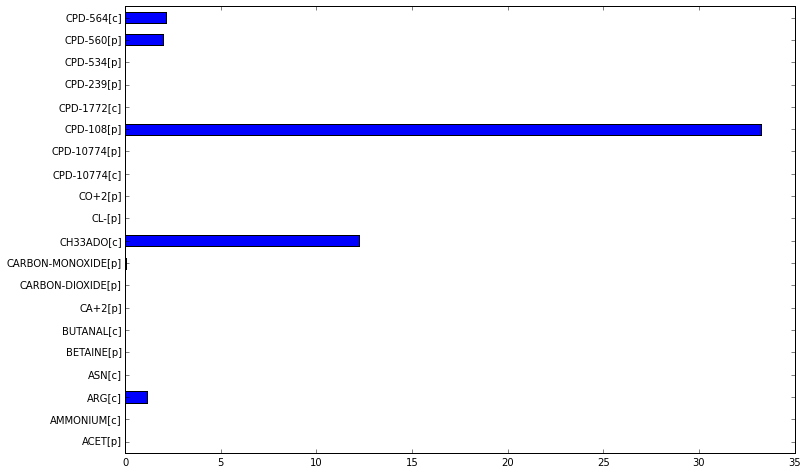

In [45]:
%matplotlib inline
mpld3.disable_notebook()
plt.rcParams['figure.figsize'] = (12,8)
plt.figure()
r.fbaResults.externalExchangeFluxes.iloc[:,:20].sum().plot.barh()

In [12]:
# r.fbaResults.reactionFluxes['DAHPSYN-RXN'].plot()
# r.fbaResults.externalExchangeFluxes['GLC[p]'].plot()
np.any(r.fbaResults.externalExchangeFluxes == -np.inf)

True

In [32]:
!cat ../reconstruction/ecoli/flat/reactions.tsv | grep OXYGEN-MOLECULE | awk '{ print $1, ","}'

"RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59." ,
"OCTAPRENYL-METHYL-METHOXY-BENZOQ-OH-RXN" ,
"PMPOXI-RXN" ,
"PNPOXI-RXN" ,
"RXN0-6973" ,
"RXN0-1461" ,
"RXN0-280-CPD-3745/FMNH2/OXYGEN-MOLECULE//GLYCOLALDEHYDE/SO3/FMN/WATER/PROTON.68." ,
"L-ASPARTATE-OXID-RXN" ,
"RXN0-1483[CCO-PERI-BAC]-FE+2/PROTON/OXYGEN-MOLECULE//FE+3/WATER.54." ,
"2-OCTAPRENYLPHENOL-HYDROX-RXN" ,
"RXN0-5364" ,
"2-OCTAPRENYL-6-METHOXYPHENOL-HYDROX-RXN" ,
"RXN0-2945" ,
"SUPEROX-DISMUT-RXN[CCO-PERI-BAC]-SUPER-OXIDE/PROTON//HYDROGEN-PEROXIDE/OXYGEN-MOLECULE.68." ,
"TRANS-RXN0-474" ,
"CATAL-RXN" ,
"RXN-13418" ,
"RXN0-5268-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59." ,
"RXN0-3921" ,
"RXN0-280-CPD-10434/FMNH2/OXYGEN-MOLECULE//ACETALD/SO3/FMN/WATER/PROTON.62." ,
"RXN0-280-CPD-3746/FMNH2/OXYGEN-MOLECULE//FORMALDEHYDE/SO3/FMN/WATER/PROTON.66." ,
"RXN0-2042" ,
"PROTOPORGENOXI-RXN" ,


In [33]:
rxns = [
"RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59." ,
"OCTAPRENYL-METHYL-METHOXY-BENZOQ-OH-RXN" ,
"PMPOXI-RXN" ,
"PNPOXI-RXN" ,
"RXN0-6973" ,
"RXN0-1461" ,
"RXN0-280-CPD-3745/FMNH2/OXYGEN-MOLECULE//GLYCOLALDEHYDE/SO3/FMN/WATER/PROTON.68." ,
"L-ASPARTATE-OXID-RXN" ,
"RXN0-1483[CCO-PERI-BAC]-FE+2/PROTON/OXYGEN-MOLECULE//FE+3/WATER.54." ,
"2-OCTAPRENYLPHENOL-HYDROX-RXN" ,
"RXN0-5364" ,
"2-OCTAPRENYL-6-METHOXYPHENOL-HYDROX-RXN" ,
"RXN0-2945" ,
"SUPEROX-DISMUT-RXN[CCO-PERI-BAC]-SUPER-OXIDE/PROTON//HYDROGEN-PEROXIDE/OXYGEN-MOLECULE.68." ,
"TRANS-RXN0-474" ,
"CATAL-RXN" ,
"RXN-13418" ,
"RXN0-5268-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59." ,
"RXN0-3921" ,
"RXN0-280-CPD-10434/FMNH2/OXYGEN-MOLECULE//ACETALD/SO3/FMN/WATER/PROTON.62." ,
"RXN0-280-CPD-3746/FMNH2/OXYGEN-MOLECULE//FORMALDEHYDE/SO3/FMN/WATER/PROTON.66." ,
"RXN0-2042" ,
"PROTOPORGENOXI-RXN" ,]

In [41]:
mpld3.enable_notebook()
(r.fbaResults.reactionFluxes[rxns] == np.nan).any()

RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59.                      False
OCTAPRENYL-METHYL-METHOXY-BENZOQ-OH-RXN                                                       False
PMPOXI-RXN                                                                                    False
PNPOXI-RXN                                                                                    False
RXN0-6973                                                                                     False
RXN0-1461                                                                                     False
RXN0-280-CPD-3745/FMNH2/OXYGEN-MOLECULE//GLYCOLALDEHYDE/SO3/FMN/WATER/PROTON.68.              False
L-ASPARTATE-OXID-RXN                                                                          False
RXN0-1483[CCO-PERI-BAC]-FE+2/PROTON/OXYGEN-MOLECULE//FE+3/WATER.54.                           False
2-OCTAPRENYLPHENOL-HYDROX-RXN                                                                 False


In [23]:
print (r.fbaResults.externalExchangeFluxes == -np.inf).any()

ACET[p]                                      False
AMMONIUM[c]                                   True
ARG[c]                                       False
ASN[c]                                       False
BETAINE[p]                                   False
BUTANAL[c]                                   False
CA+2[p]                                       True
CARBON-DIOXIDE[p]                             True
CARBON-MONOXIDE[p]                           False
CH33ADO[c]                                   False
CL-[p]                                        True
CO+2[p]                                       True
CPD-10774[c]                                 False
CPD-10774[p]                                 False
CPD-108[p]                                   False
CPD-1772[c]                                  False
CPD-239[p]                                   False
CPD-534[p]                                   False
CPD-560[p]                                   False
CPD-564[c]                     

In [19]:
r.fbaResults.externalExchangeFluxes.columns[(r.fbaResults.externalExchangeFluxes == -np.inf).any()]

Index([u'AMMONIUM[c]', u'CA+2[p]', u'CARBON-DIOXIDE[p]', u'CL-[p]', u'CO+2[p]',
       u'CPD0-1958[p]', u'FE+2[p]', u'K+[p]', u'MG+2[p]', u'MN+2[p]',
       u'NI+2[p]', u'OXYGEN-MOLECULE[p]', u'Pi[p]', u'SULFATE[p]', u'WATER[p]',
       u'ZN+2[p]'],
      dtype='object')

In [ ]:
ecocyc('DAHPSYN_RXN')

In [ ]:
r.bulkMolecules.counts[r.bulkMolecules.counts.sum().nonzero()[0]].shape

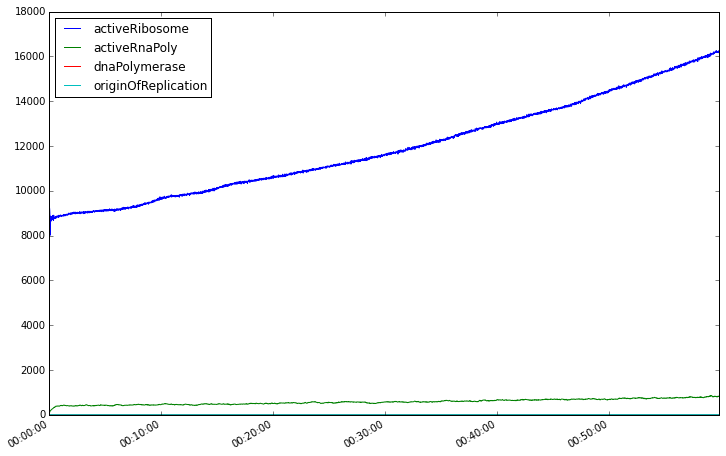

In [36]:
r.uniqueMoleculeCounts.plot()

In [51]:
r.fbaResults.externalExchangeFluxes['AMMONIUM[c]'].replace([np.inf, -np.inf], np.nan).count()

1